# DSCI 6001 4.2 Lab

## A little more plotting with vectors

(this is a non-graded lab)

Today you're going to take the code you wrote yesterday and write additional classes to achieve the goal of visualizing intersections of lines and planes. Below we have provided a bit of code that allows you to visualize vectors (with some trouble). 

### TASK:

Build a program that takes in equations of 1 line and 1 plane (they can consist of just points on the line or plane, linear coefficients, or parameters, your choice) from user input and determines if these two intersect. If they intersect, visualize the intersection as best as you can. Make sure to create a good test suite for your program. You may work in conjunction with up to 3 other class members in your group.

Note that we said "build a program." This means that the program should exist in a .py file when you are finished, and take run commands from stdin, unless you want to require the user to give `input` on command. One way of doing this is by having the program [read in a file](https://docs.python.org/2/tutorial/inputoutput.html#methods-of-file-objects) line-by-line and then parse each line. Be creative and use the help of your instructors!



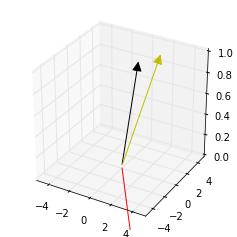

In [1]:
#A demonstration of creating planes
import numpy as np
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

#you need to reference pyplot directly to have access to the figure object
import matplotlib.pyplot as plt
from itertools import product, combinations

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

#this module allows us to do projective graphics
from mpl_toolkits.mplot3d import proj3d
#this is a patch that enables us to draw arrows in plots 
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
    #the draw method for every object is called by the show() function in plt
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

#when you make your class, you will need to add an artist for every arrow
a = Arrow3D([0,1],[0,1],[0,1], mutation_scale=20, lw=1, arrowstyle="-|>", color="k") # "k" means black. 
ax.add_artist(a)

b = Arrow3D([0,2],[0,-1],[0,-1], mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
ax.add_artist(b)

c = Arrow3D([0,2],[0,3],[0,1], mutation_scale=20, lw=1, arrowstyle="-|>", color="y")
ax.add_artist(c)

# as you can see, getting the plots to work nicely is big trouble. 
# You might consider axis rotation (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

Build a program that takes in equations of 1 line and 1 plane (they can consist of just points on the line or plane, linear coefficients, or parameters, your choice) from user input and determines if these two intersect. If they intersect, visualize the intersection as best as you can. Make sure to create a good test suite for your program. You may work in conjunction with up to 3 other class members in your group.


In [43]:
#1) check if normal of the plane , abs(slope of normal) = slope of the line
#) 2) if yes, no itnersection
#3) if no, there is an intersection

class test_intersection():
    
    def __init__(self,plane,line):
        self.plane = plane
        self.line = line
        self.normal= [self.plane[0][0],self.plane[0][1],self.plane[0][2]]
        
        print(self.line)
    
    def check_slope(self):
        slope_normal = -self.normal[0]/self.normal[1]
        slope_line = -self.line[0][0]/self.line[0][1]
        
        if slope_normal == slope_line :
            print('slopes are equal')
        else:
            print('slopes are not equal')
        
    def plot_intersection(self):
        
        ## process for plotting a plane
        
        normal_coef = np.array([self.normal])
        initial_point = np.array([[1,1,1]])
        
        d_in_plane = initial_point.dot(normal_coef.T)
        
        print(normal_coef,'normal coef')
        print(d_in_plane,'d vec')
        
        self.xx, self.yy= np.meshgrid(range(-30,30), range(-30,30))

        
        self.zz =(-self.normal[0]*self.xx - self.normal[1]*self.yy - d_in_plane)*1./self.normal[2]
        
        
        
        ## now for the vector
        
#         class Arrow3D(FancyArrowPatch):
#             def __init__(self, xs, ys, zs, *args, **kwargs):
#                 FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
#                 self._verts3d = xs, ys, zs
#                 #the draw method for every object is called by the show() function in plt
#             def draw(self, renderer):
#                 xs3d, ys3d, zs3d = self._verts3d
#                 xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
#                 self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
#                 FancyArrowPatch.draw(self, renderer)
        
        
        
        #you need to reference pyplot directly to have access to the figure object
        import matplotlib.pyplot as plt
        from itertools import product, combinations

        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.set_aspect("equal")

        #this module allows us to do projective graphics
        from mpl_toolkits.mplot3d import proj3d
        #this is a patch that enables us to draw arrows in plots 
        from matplotlib.patches import FancyArrowPatch
        
        a = Arrow3D([0,1],[0,1],[0,1], mutation_scale=20, lw=1, arrowstyle="-|>", color="k") # "k" means black. 
        ax.add_artist(a)

        plt3d = plt.figure().gca(projection='3d')
        plt3d.plot_surface(self.xx,self.yy,self.zz, color='blue')
        
        plt.show()
        
        #b_vec_plane = np.array([[d]])
        
        #elf.normal[0]*a + self.normal[1]*b+self.normal[2]*c =d
        
        pass
    
    

[[1 2 3]]
slopes are not equal
[[3 4 5]] normal coef
[[12]] d vec


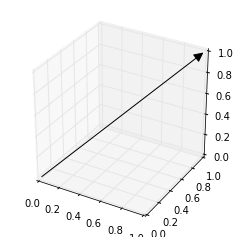

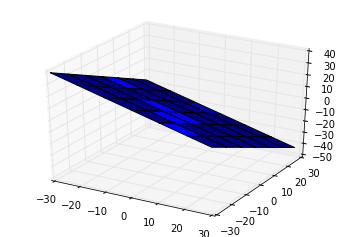

In [44]:
test = test_intersection(test_p,test_line)
test.check_slope()
test.plot_intersection()

In [4]:
#equation for a plane = ax + by + cz = d
#equation for a line = ax + by = c
#slope of a line is -a/b


test_p= np.array([[3,4,5,6]])
test_line = np.array([[1,2,3]])



In [29]:
test_p[0][2]

5

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


class plot_plane():
    
    def __init__(self,pointx,pointy,pointz):
        pointx = np.array(pointx)
        pointy = np.array(pointy)
        pointz = np.array(pointz)
        
        self.vec1 = pointx-pointy
        self.vec2 = pointz-pointx
        
        # a plane is a*x+b*y+c*z+d=0
        
        self.cross = np.cross(self.vec1,self.vec2)
        
       
        
        self.xx, self.yy = np.meshgrid(range(-30,30), range(-30,30))
        
        
        self.d1= -(self.cross[0]*pointx[0] +self.cross[1]*pointx[1] + self.cross[2]*pointx[2] )
        
        self.zz = (-self.cross[0]*xx - self.cross[1]*yy - self.d1)*1./self.cross[2]
        
        
        
        
        
    def results(self):
        print(self.d1, ' self d1')
        
        print(self.vec1,'vec1',self.vec2,'vec2',self.cross,'self cross',self.d1,'d1')
        
        #print(self.plane, ' plane')
        
    def plot(self):
        
        plt3d = plt.figure().gca(projection='3d')
        plt3d.plot_surface(self.xx,self.yy,self.zz, color='blue')
        plt.show()
            
    

       
    